In [12]:
import pandas as pd

In [13]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

In [14]:
import pandas as pd

def diving_data(train, test, submission):
    # Obtener las dimensiones de los datasets
    num_train_rows, num_train_columns = train.shape
    num_test_rows, num_test_columns = test.shape
    num_submission_rows, num_submission_columns = submission.shape

    # Imprimir información sobre el dataset de entrenamiento
    print("Training Data:")
    print(f"Number of Rows: {num_train_rows}")
    print(f"Number of Columns: {num_train_columns}\n")

    # Imprimir información sobre el dataset de test
    print("Test Data:")
    print(f"Number of Rows: {num_test_rows}")
    print(f"Number of Columns: {num_test_columns}\n")

    # Imprimir información sobre el dataset de submission
    print("Submission Data:")
    print(f"Number of Rows: {num_submission_rows}")
    print(f"Number of Columns: {num_submission_columns}")

    # Contar valores nulos en los datasets
    train_null = train.isnull().sum().sum()
    test_null = test.isnull().sum().sum()

    print(f'\nNull Count in Train: {train_null}')
    print(f'Null Count in Test: {test_null}')

    # Contar filas duplicadas en los datasets
    train_duplicates = train.duplicated().sum()
    test_duplicates = test.duplicated().sum()
    submission_duplicates = submission.duplicated().sum()

    print(f"\nNumber of duplicate rows in train data: {train_duplicates}")
    print(f"Number of duplicate rows in test data: {test_duplicates}")
    print(f"Number of duplicate rows in submission data: {submission_duplicates}")

    # Imprimir número de valores únicos en las columnas del conjunto de entrenamiento
    print(f"\nNumber of unique values in train data:\n {train.nunique()}")

diving_data(train, test, submission)


Training Data:
Number of Rows: 42000
Number of Columns: 785

Test Data:
Number of Rows: 28000
Number of Columns: 784

Submission Data:
Number of Rows: 28000
Number of Columns: 2

Null Count in Train: 0
Null Count in Test: 0

Number of duplicate rows in train data: 0
Number of duplicate rows in test data: 0
Number of duplicate rows in submission data: 0

Number of unique values in train data:
 label       10
pixel0       1
pixel1       1
pixel2       1
pixel3       1
            ..
pixel779     3
pixel780     1
pixel781     1
pixel782     1
pixel783     1
Length: 785, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
x_train = train.drop(columns = ['label'])
y_train = train['label']

In [17]:
x_train = x_train / 255.0 
test = test / 255.0

In [18]:
print(x_train.shape)

(42000, 784)


In [19]:
x_train = x_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [22]:
print(x_train.shape)
print(test.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [ ]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=0)

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,BatchNormalization,Flatten,Dense

In [ ]:
# pip install tensorflow

   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/390.3 MB 6.7 MB/s eta 0:00:58
   ---------------------------------------- 3.1/390.3 MB 7.7 MB/s eta 0:00:51
    --------------------------------------- 5.2/390.3 MB 8.4 MB/s eta 0:00:46
    --------------------------------------- 9.2/390.3 MB 11.0 MB/s eta 0:00:35
   - -------------------------------------- 15.5/390.3 MB 14.7 MB/s eta 0:00:26
   -- ------------------------------------- 22.3/390.3 MB 17.6 MB/s eta 0:00:21
   -- ------------------------------------- 28.8/390.3 MB 19.5 MB/s eta 0:00:19
   --- ------------------------------------ 35.1/390.3 MB 20.7 MB/s eta 0:00:18
   ---- ----------------------------------- 41.4/390.3 MB 21.6 MB/s eta 0:00:17
   ---- ----------------------------------- 47.7/390.3 MB 22.3 MB/s eta 0:00:16
   ----- ---------------------------------- 53.0/390.3 MB 22.6 MB/s eta 0:00:15
   ----- ---------------------------------- 58.2/390.3 M

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.5),

    #out put layer
    Dense(10, activation='softmax')
])

c:\Users\Jjaavviieerroperro\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,418 (880.54 KB)

 Trainable params: 225,226 (879.79 KB)

 Non-trainable params: 192 (768.00 B)

In [30]:
history = model.fit(x_train,y_train,epochs=30,batch_size=64,validation_data=(x_val, y_val))


Epoch 1/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.7589 - loss: 0.8387 - val_accuracy: 0.9580 - val_loss: 0.1297
Epoch 2/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 25s 47ms/step - accuracy: 0.9527 - loss: 0.1583 - val_accuracy: 0.9824 - val_loss: 0.0628
Epoch 3/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.9641 - loss: 0.1184 - val_accuracy: 0.9829 - val_loss: 0.0615
Epoch 4/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.9710 - loss: 0.0917 - val_accuracy: 0.9861 - val_loss: 0.0511
Epoch 5/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 26s 49ms/step - accuracy: 0.9746 - loss: 0.0853 - val_accuracy: 0.9864 - val_loss: 0.0536
Epoch 6/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 26s 50ms/step - accuracy: 0.9770 - loss: 0.0743 - val_accuracy: 0.9870 - val_loss: 0.0534
Epoch 7/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 25s 47ms/step - accuracy: 0.9787 - loss: 0.0721 - val_accuracy: 0.9881 - val_loss: 0.0507
Epoch 8/30
525/525 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.9825 - loss: 0.0602 - 

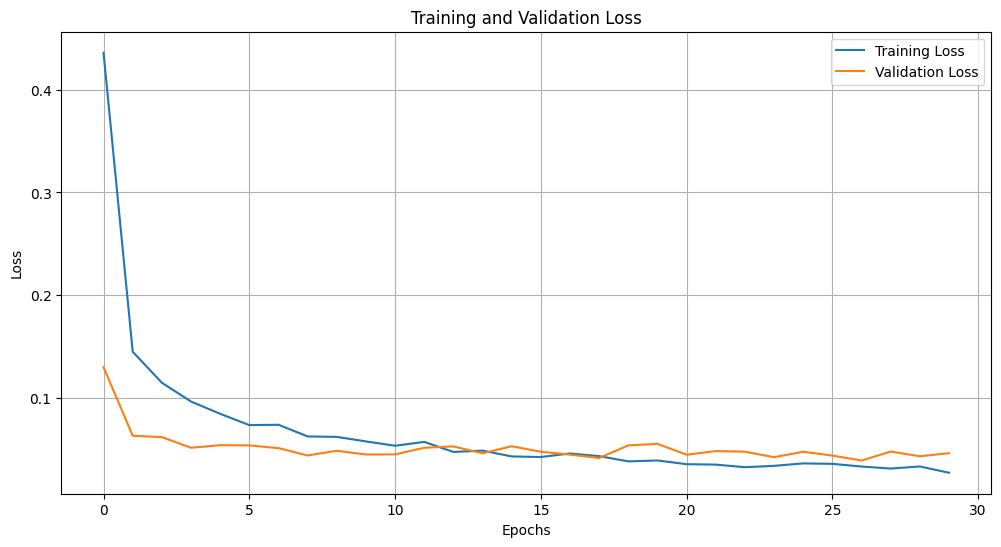

In [31]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

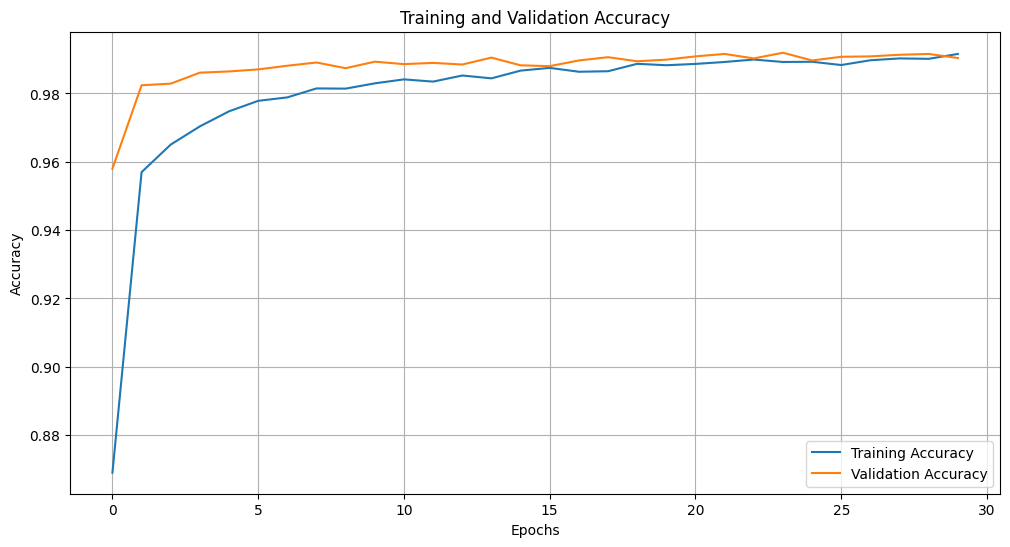

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
import numpy as np

In [34]:
predictions = model.predict(test)
predicted_labels = np.argmax(predictions, axis=1)

submission = pd.DataFrame({
    'ImageId': np.arange(1, len(predicted_labels) + 1),
    'Label': predicted_labels
})


submission.to_csv('Pruebas/submission.csv', index=False)

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [35]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [36]:
val_loss, val_accuracy = model.evaluate(x_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9910 - loss: 0.0465
Validation Accuracy: 99.04%
